Installation des packages

In [ ]:
pip install pandas numpy scikit-learn keras pyreadr tensorflow

**1. Chargement des bibliothèques**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
import pyreadr

2. **Importation du dataset**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.rds to data.rds


3. **Chargement et exploration**

In [ ]:
# Charger et préparer les données
result = pyreadr.read_r("data.rds")
data_tot = result[None]
data_t1 = data_tot[['hosp_exp_flg', 'censor_flg', 'sepsis_flg', 'chf_flg', 'afib_flg', 'renal_flg', 'liver_flg', 'copd_flg', 'cad_flg', 'aline_flg', 'icu_los_day', 'hospital_los_day', 'age', 'gender_num', 'icu_exp_flg', 'day_28_flg', 'service_num', 'mort_day_censored', 'day_icu_intime_num']]
data_t1['hosp_exp_flg'] = pd.to_numeric(data_t1['hosp_exp_flg'])

# Exploration des données
data_t1.head()
data_t1.info()
data_t1.describe()

5. **Normalisation**

In [6]:
# Créer de nouvelles caractéristiques si nécessaire
# Normaliser les caractéristiques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_t1.drop('hosp_exp_flg', axis=1))

6. **Séparation du dataset**

In [8]:
# Division des données en ensembles d'entraînement, de validation et de test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, data_t1['hosp_exp_flg'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Optimisation des hyperparamètres
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_lr_model = grid_search.best_estimator_

# Entraînement du modèle final
best_lr_model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000)

7. **Validation croisée**

In [9]:
# Validation croisée
cv_scores = cross_val_score(best_lr_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Évaluation du modèle sur l'ensemble de validation
y_val_pred = best_lr_model.predict(X_val)
print("Accuracy on validation set:", accuracy_score(y_val, y_val_pred))
print("Classification report on validation set:\n", classification_report(y_val, y_val_pred))
print("Confusion matrix on validation set:\n", confusion_matrix(y_val, y_val_pred))


Cross-validation scores: [0.99173554 0.95041322 0.97520661 0.97520661 0.98333333]
Mean cross-validation score: 0.9751790633608814
Accuracy on validation set: 0.9769230769230769
Classification report on validation set:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       112
           1       0.89      0.94      0.92        18

    accuracy                           0.98       130
   macro avg       0.94      0.96      0.95       130
weighted avg       0.98      0.98      0.98       130

Confusion matrix on validation set:
 [[110   2]
 [  1  17]]


8. **Random_Forest**

In [10]:
# Entraînement d'un modèle de forêt aléatoire pour comparer
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred_rf = rf_model.predict(X_val)
print("Accuracy on validation set (Random Forest):", accuracy_score(y_val, y_val_pred_rf))


Accuracy on validation set (Random Forest): 0.9846153846153847


9. **Réseau de neurones**

Epoch 1/20
10/10 [==============================] - 7s 233ms/step - loss: 0.7729 - accuracy: 0.4056 - val_loss: 0.6374 - val_accuracy: 0.7692
Epoch 2/20
10/10 [==============================] - 0s 27ms/step - loss: 0.5436 - accuracy: 0.8725 - val_loss: 0.4747 - val_accuracy: 0.9000
Epoch 3/20
10/10 [==============================] - 0s 23ms/step - loss: 0.4033 - accuracy: 0.9371 - val_loss: 0.3622 - val_accuracy: 0.9231
Epoch 4/20
10/10 [==============================] - 0s 33ms/step - loss: 0.3025 - accuracy: 0.9387 - val_loss: 0.2773 - val_accuracy: 0.9231
Epoch 5/20
10/10 [==============================] - 0s 31ms/step - loss: 0.2251 - accuracy: 0.9536 - val_loss: 0.2140 - val_accuracy: 0.9462
Epoch 6/20
10/10 [==============================] - 0s 42ms/step - loss: 0.1701 - accuracy: 0.9719 - val_loss: 0.1711 - val_accuracy: 0.9462
Epoch 7/20
10/10 [==============================] - 0s 29ms/step - loss: 0.1327 - accuracy: 0.9752 - val_loss: 0.1424 - val_accuracy: 0.9692
Epoch 8/20
1

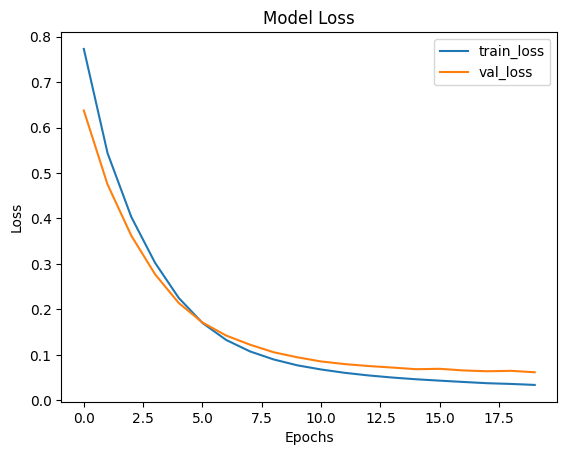

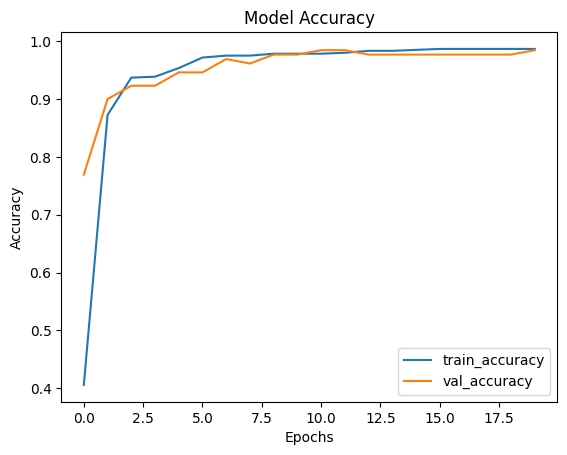

In [11]:
# Création du modèle Keras
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

# Affichage des courbes d'apprentissage
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

10.